<a href="https://colab.research.google.com/github/Airee66/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 20: Numerical Differentiation
### Ainsley Chapman
### Date: 3/4/2023

## Section 20.1 - Numerical Differentiation Problem Statement
A numerical grid is an evenly spaced set of points over the domain of a function (i.e., the independent variable), over some interval.

The linspace function in python can be used to generate numerical grids in a single dimension.

In [6]:
import numpy as np
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

## Section 20.2 - Finite Difference Approximating Derivatives

Forward difference:
$$ f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j} $$

Backward difference:
$$ f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}} $$

Central difference:
$$ f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}} $$

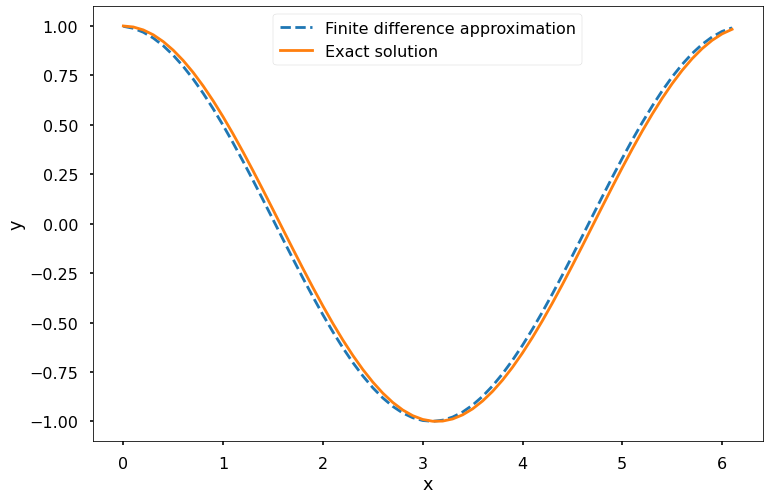

0.04997515074549317


In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h) 
# compute function
y = np.sin(x) 

# compute vector of forward differences
forward_diff = np.diff(y)/h 
# compute corresponding grid
x_diff = x[:-1:] 
# compute exact solution
exact_solution = np.cos(x_diff) 

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

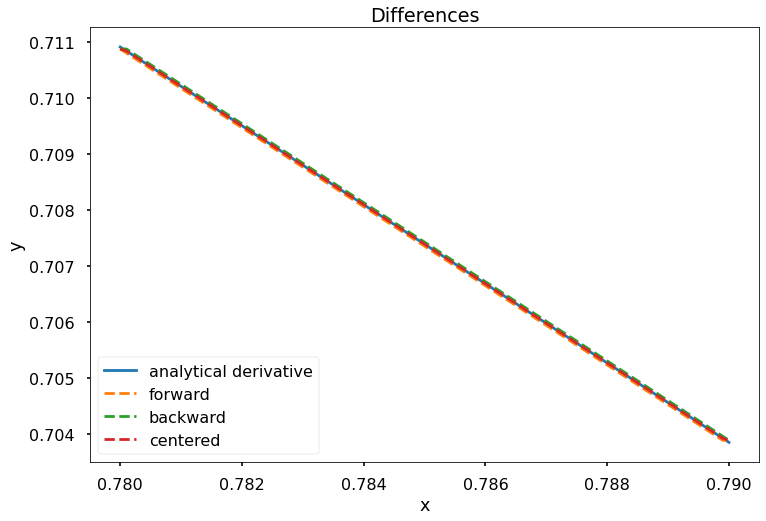

In [8]:
from pylab import *
import time

x = np.linspace(0.78,0.79,100)
y = np.sin(x)
dy_analytical = np.cos(x)

'forward diff'
tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

'backward diff'
tb1 = time.time()
dyb = [0.0]*len(x)
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

'center diff'
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

plt.figure(figsize = (12, 8))
plt.plot(x,dy_analytical,label='analytical derivative')
plt.plot(x,dyf,'--',label='forward')
plt.plot(x,dyb,'--',label='backward')
plt.plot(x,dyc,'--',label='centered')

plt.legend(loc='lower left')
plt.title('Differences')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


## Section 20.3 - Approximating of Higher Order Derivatives

$$ f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) + h^2f''(x_j) + \frac{h^4f''''(x_j)}{24} + \cdots, 
\quad ⇒ \quad 
f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2},$$



## Section 20.4 - Numerical Differentiation with Noise

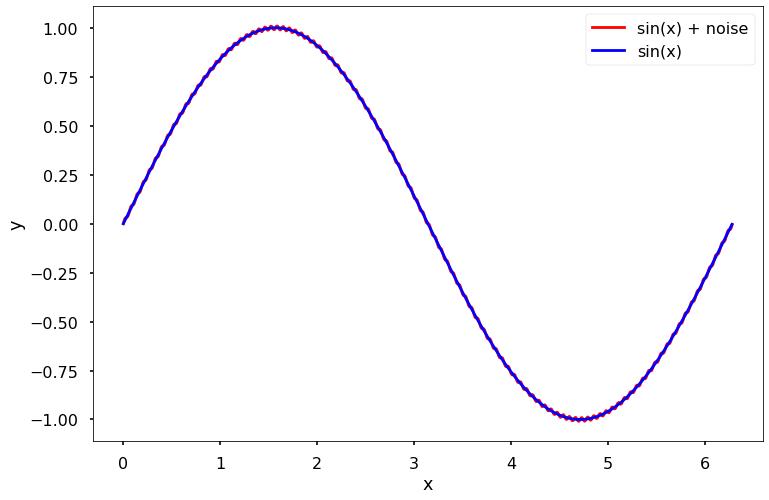

In [9]:
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
omega = 100
epsilon = 0.01

y = np.sin(x) 
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'sin(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'sin(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

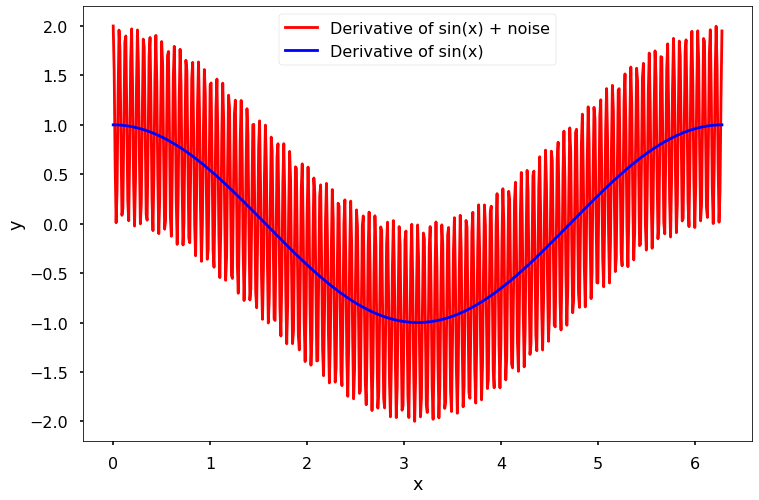

In [10]:
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
y = np.cos(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative of sin(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of sin(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()